In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

In [49]:
df=pd.read_csv(r"C:\Users\Ragu\medical_insurance\data\insurance.csv")
df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.shape

(1338, 7)

In [5]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [6]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
df.duplicated().sum()

1

In [8]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<Axes: xlabel='age', ylabel='Count'>

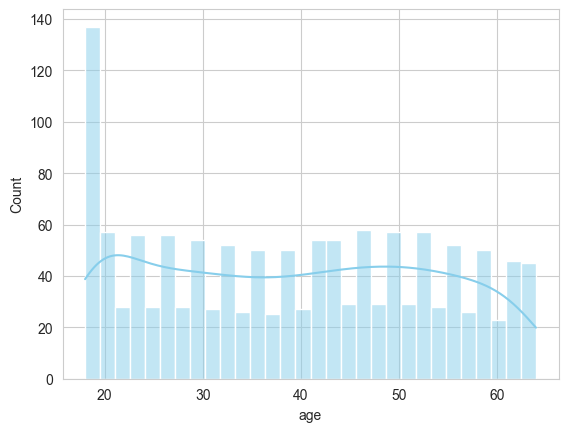

In [9]:

# Plot 1: Age Distribution
sns.histplot(df['age'], bins=30, kde=True,color='skyblue')


<Axes: xlabel='charges', ylabel='Count'>

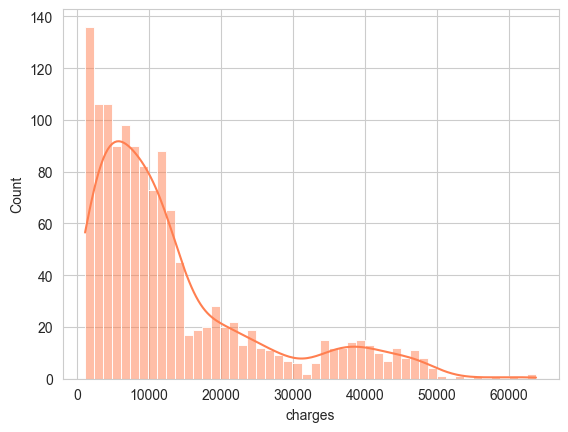

In [10]:
# Plot 2: Charges Distribution (THE TARGET)
sns.histplot(df['charges'], bins=50, kde=True,  color='coral')


<Axes: xlabel='bmi', ylabel='Count'>

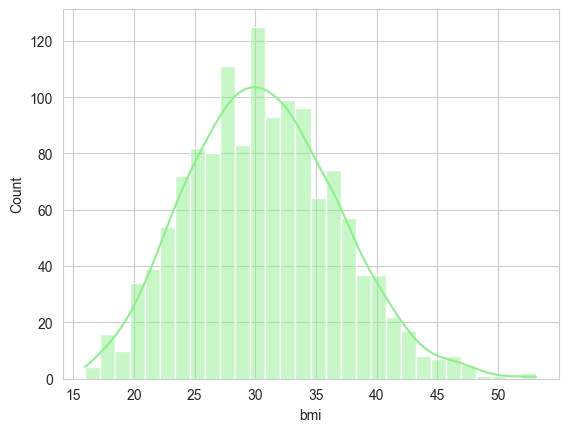

In [11]:
# Plot 3: BMI Distribution
sns.histplot(df['bmi'], bins=30, kde=True, color='lightgreen')


<Axes: ylabel='charges'>

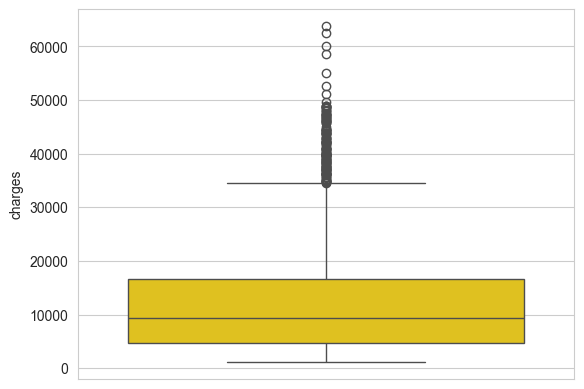

In [12]:
# Plot 4: Box plot of Charges (shows outliers clearly)
sns.boxplot(y=df['charges'], color='gold')


In [13]:
# Print key insights
print("🔍 KEY VISUAL INSIGHTS:")
print(f"1. Charges Mean (${df['charges'].mean():.0f}) > Median (${df['charges'].median():.0f}) by {((df['charges'].mean()/df['charges'].median()-1)*100):.0f}%")
print("   → Right-skewed: Few people pay VERY high costs")
print(f"2. Age is fairly uniform: Mean ({df['age'].mean():.1f}) ≈ Median ({df['age'].median():.1f})")
print("   → Good distribution for learning")
print(f"3. {(df['bmi']>30).sum()} people ({(df['bmi']>30).mean()*100:.1f}%) are obese (BMI>30)")
print("   → Health risk factor present in data")

🔍 KEY VISUAL INSIGHTS:
1. Charges Mean ($13270) > Median ($9382) by 41%
   → Right-skewed: Few people pay VERY high costs
2. Age is fairly uniform: Mean (39.2) ≈ Median (39.0)
   → Good distribution for learning
3. 705 people (52.7%) are obese (BMI>30)
   → Health risk factor present in data


C:\Users\Ragu\AppData\Local\Temp\ipykernel_12360\1720089673.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='smoker', y='charges', data=df,  palette='Set2')


<Axes: xlabel='smoker', ylabel='charges'>

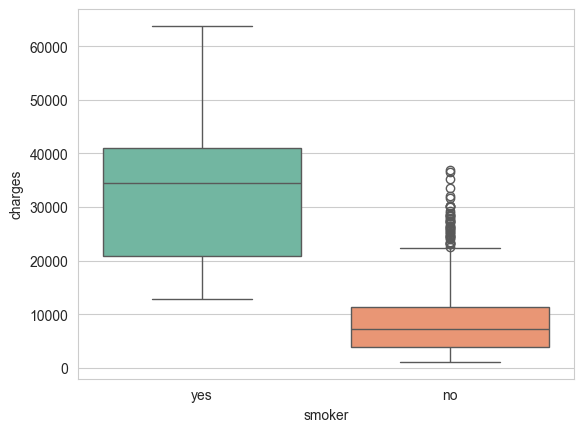

In [14]:
sns.boxplot(x='smoker', y='charges', data=df,  palette='Set2')

<Axes: xlabel='age', ylabel='charges'>

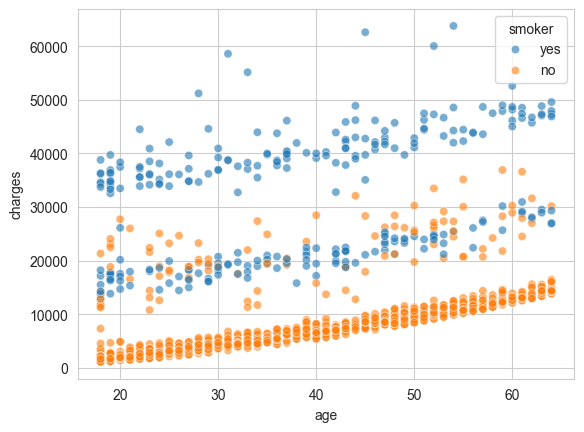

In [15]:
sns.scatterplot(x='age', y='charges', hue='smoker', data=df,  alpha=0.6)

<Axes: xlabel='bmi', ylabel='charges'>

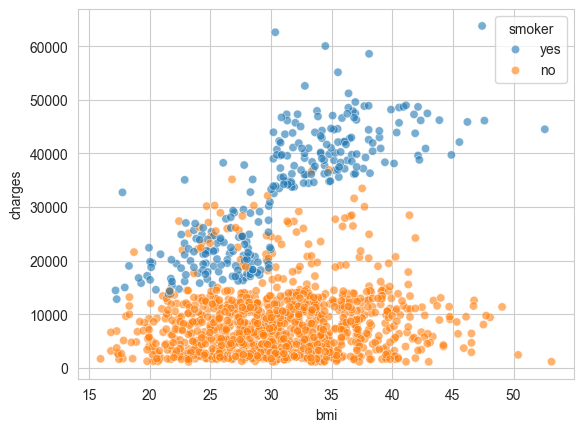

In [16]:
sns.scatterplot(x='bmi', y='charges', hue='smoker', data=df,  alpha=0.6)

C:\Users\Ragu\AppData\Local\Temp\ipykernel_12360\4293134055.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='region', y='charges', data=df,  palette='muted')


<Axes: xlabel='region', ylabel='charges'>

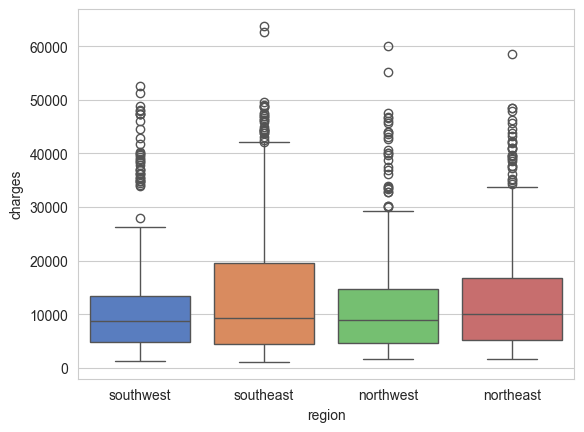

In [17]:
sns.boxplot(x='region', y='charges', data=df,  palette='muted')

In [18]:
# Calculate the "Smoking Impact"
smoker_impact = df.groupby('smoker')['charges'].agg(['mean', 'median', 'count'])
print("💰 SMOKING IMPACT ANALYSIS:")
print(smoker_impact)
print(f"\n🔥 Smoking increases insurance cost by: ${smoker_impact.loc['yes', 'mean'] - smoker_impact.loc['no', 'mean']:.0f}")
print(f"   That's {((smoker_impact.loc['yes', 'mean'] / smoker_impact.loc['no', 'mean']) - 1)*100:.0f}% more expensive!")

💰 SMOKING IMPACT ANALYSIS:
                mean       median  count
smoker                                  
no       8434.268298   7345.40530   1064
yes     32050.231832  34456.34845    274

🔥 Smoking increases insurance cost by: $23616
   That's 280% more expensive!


In [19]:
df_clean = df.drop_duplicates()

In [21]:
print(f"Before: {df.shape[0]} rows")
df_clean = df.drop_duplicates()
print(f"After removing duplicates: {df_clean.shape[0]} rows")
print(f"Removed: {df.shape[0] - df_clean.shape[0]} duplicate row\n")

Before: 1338 rows
After removing duplicates: 1337 rows
Removed: 1 duplicate row



In [23]:
df_processed=df_clean.copy()

In [24]:
df_processed['sex_encoded']= df_processed['sex'].map({'male':1,'female':0})

In [25]:
print(df_processed[['sex', 'sex_encoded']].head(3))

      sex  sex_encoded
0  female            0
1    male            1
2    male            1


In [26]:
df_processed['smoke_encoded']=df_processed['smoker'].map({'yes':1,'no':0})

In [27]:
df_region=pd.get_dummies(df_processed['region'],prefix='region')


In [28]:
df_processed=pd.concat([df_processed,df_region],axis=1)

In [29]:
df_processed['charges_log']=np.log(df_processed['charges'])

In [30]:
print(f"\nOriginal charges range: ${df_processed['charges'].min():.0f} - ${df_processed['charges'].max():.0f}")
print(f"Log charges range: {df_processed['charges_log'].min():.2f} - {df_processed['charges_log'].max():.2f}")



Original charges range: $1122 - $63770
Log charges range: 7.02 - 11.06


In [33]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

feature_columns=['age','bmi','children','smoke_encoded','sex_encoded','region_northeast','region_northwest','region_southeast','region_southwest']

In [34]:
X= df_processed[feature_columns]
y=df_processed['charges_log']


In [35]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


In [36]:
scale_children=MinMaxScaler()
X_train[['children']] = scale_children.fit_transform(X_train[['children']])
X_test[['children']]=scale_children.transform(X_test[['children']])

In [38]:
scaler_age_bmi = StandardScaler()
X_train[['age', 'bmi']] = scaler_age_bmi.fit_transform(X_train[['age', 'bmi']])
X_test[['age', 'bmi']] = scaler_age_bmi.transform(X_test[['age', 'bmi']])

In [39]:
print("\nScaled training data (first 3 rows):")
print(X_train.head(3))


Scaled training data (first 3 rows):
           age       bmi  children  smoke_encoded  sex_encoded  \
1114 -1.157680 -0.996928       0.0              0            1   
968  -1.300619 -0.792762       0.4              0            1   
599   0.914926  1.154664       0.4              0            0   

      region_northeast  region_northwest  region_southeast  region_southwest  
1114              True             False             False             False  
968               True             False             False             False  
599              False              True             False             False  


In [40]:
import joblib
joblib.dump(scaler_age_bmi,r'C:\Users\Ragu\medical_insurance\job\scaler_age_bmi.pkl')
joblib.dump(scale_children,r'C:\Users\Ragu\medical_insurance\job\scale_children.pkl')

['C:\\Users\\Ragu\\medical_insurance\\job\\scale_children.pkl']

In [42]:
# Cell 8: Training Multiple Models - The Competition!

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Dictionary to store results
results = {}

# Model 1: Linear Regression (The Baseline)
print("🎯 Training Model 1: Linear Regression...")
lr = LinearRegression()
lr.fit(X_train, y_train)
pred_lr = lr.predict(X_test)

# Convert predictions back from log scale to dollars
pred_lr_dollars = np.exp(pred_lr)
y_test_dollars = np.exp(y_test)

results['Linear Regression'] = {
    'MAE': mean_absolute_error(y_test_dollars, pred_lr_dollars),
    'RMSE': np.sqrt(mean_squared_error(y_test_dollars, pred_lr_dollars)),
    'R2': r2_score(y_test_dollars, pred_lr_dollars),
    'model': lr
}

print(f"✅ Linear Regression trained!")
print(f"   MAE: ${results['Linear Regression']['MAE']:,.0f}")
print(f"   R²:  {results['Linear Regression']['R2']:.3f}\n")

# Model 2: Ridge Regression (Linear + Regularization)
# Regularization = prevents overfitting by penalizing huge weights
print("🎯 Training Model 2: Ridge Regression...")
ridge = Ridge(alpha=1.0)  # alpha controls penalty strength
ridge.fit(X_train, y_train)
pred_ridge = np.exp(ridge.predict(X_test))

results['Ridge Regression'] = {
    'MAE': mean_absolute_error(y_test_dollars, pred_ridge),
    'RMSE': np.sqrt(mean_squared_error(y_test_dollars, pred_ridge)),
    'R2': r2_score(y_test_dollars, pred_ridge),
    'model': ridge
}

print(f"✅ Ridge Regression trained!")
print(f"   MAE: ${results['Ridge Regression']['MAE']:,.0f}")
print(f"   R²:  {results['Ridge Regression']['R2']:.3f}\n")

# Model 3: Lasso Regression (Linear + Feature Selection)
# Can reduce useless feature weights to ZERO (automatic feature selection!)
print("🎯 Training Model 3: Lasso Regression...")
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
pred_lasso = np.exp(lasso.predict(X_test))

results['Lasso Regression'] = {
    'MAE': mean_absolute_error(y_test_dollars, pred_lasso),
    'RMSE': np.sqrt(mean_squared_error(y_test_dollars, pred_lasso)),
    'R2': r2_score(y_test_dollars, pred_lasso),
    'model': lasso
}

print(f"✅ Lasso Regression trained!")
print(f"   MAE: ${results['Lasso Regression']['MAE']:,.0f}")
print(f"   R²:  {results['Lasso Regression']['R2']:.3f}\n")

# Model 4: Random Forest (The Powerhouse)
# Ensemble of many decision trees - like asking 100 experts and averaging their answers
print("🎯 Training Model 4: Random Forest...")
rf = RandomForestRegressor(n_estimators=100,  # 100 trees
                          max_depth=10,        # Prevent overfitting
                          random_state=42,
                          n_jobs=-1)          # Use all CPU cores
rf.fit(X_train, y_train)
pred_rf = np.exp(rf.predict(X_test))

results['Random Forest'] = {
    'MAE': mean_absolute_error(y_test_dollars, pred_rf),
    'RMSE': np.sqrt(mean_squared_error(y_test_dollars, pred_rf)),
    'R2': r2_score(y_test_dollars, pred_rf),
    'model': rf
}

print(f"✅ Random Forest trained!")
print(f"   MAE: ${results['Random Forest']['MAE']:,.0f}")
print(f"   R²:  {results['Random Forest']['R2']:.3f}\n")

# Compare all models
print("🏆 MODEL COMPARISON:")
print("=" * 60)
print(f"{'Model':<20} {'MAE ($)':<15} {'RMSE ($)':<15} {'R² Score':<10}")
print("=" * 60)
for name, metrics in results.items():
    print(f"{name:<20} ${metrics['MAE']:>13,.0f} ${metrics['RMSE']:>13,.0f} {metrics['R2']:>8.3f}")

# Find best model
best_model_name = min(results, key=lambda x: results[x]['MAE'])
print("=" * 60)
print(f"\n🥇 BEST MODEL: {best_model_name}")
print(f"   Average Error: ${results[best_model_name]['MAE']:,.0f}")

# Save best model
best_model = results[best_model_name]['model']
joblib.dump(best_model, r'C:\Users\Ragu\medical_insurance\job\best_model.pkl')
print(f"\n💾 Best model saved to ../models/best_model.pkl")

🎯 Training Model 1: Linear Regression...
✅ Linear Regression trained!
   MAE: $3,756
   R²:  0.718

🎯 Training Model 2: Ridge Regression...
✅ Ridge Regression trained!
   MAE: $3,754
   R²:  0.720

🎯 Training Model 3: Lasso Regression...
✅ Lasso Regression trained!
   MAE: $5,267
   R²:  0.486

🎯 Training Model 4: Random Forest...
✅ Random Forest trained!
   MAE: $2,049
   R²:  0.897

🏆 MODEL COMPARISON:
Model                MAE ($)         RMSE ($)        R² Score  
Linear Regression    $        3,756 $        7,198    0.718
Ridge Regression     $        3,754 $        7,171    0.720
Lasso Regression     $        5,267 $        9,720    0.486
Random Forest        $        2,049 $        4,354    0.897

🥇 BEST MODEL: Random Forest
   Average Error: $2,049

💾 Best model saved to ../models/best_model.pkl


In [46]:
joblib.dump(lr,r'C:\Users\Ragu\medical_insurance\models\linear_model.pkl')

['C:\\Users\\Ragu\\medical_insurance\\models\\linear_model.pkl']

In [47]:
joblib.dump(ridge,r'C:\Users\Ragu\medical_insurance\models\ridge_model.pkl')

['C:\\Users\\Ragu\\medical_insurance\\models\\ridge_model.pkl']

In [48]:
joblib.dump(lasso,r'C:\Users\Ragu\medical_insurance\models\lasso_model.pkl')

['C:\\Users\\Ragu\\medical_insurance\\models\\lasso_model.pkl']